<a href="https://colab.research.google.com/github/Nukunda/DL-Assignment-1-/blob/main/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x266 at 0x7D928E5806D0>


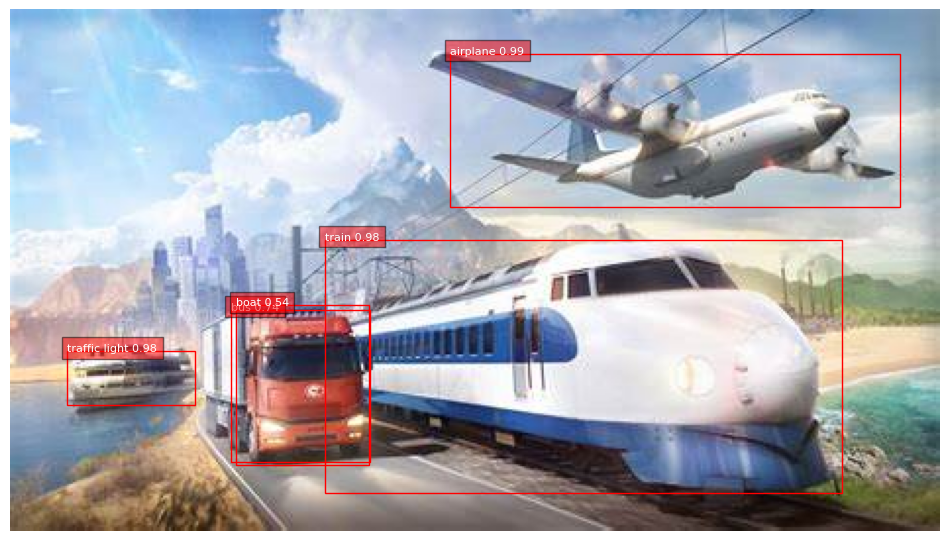

In [2]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torchvision.transforms as transforms

input_image = Image.open("/content/img123.jfif")
print(input_image)

max_size = 1000
if input_image.size[0] > max_size or input_image.size[1] > max_size:
    input_image.thumbnail((max_size, max_size))

tensor_transform = transforms.Compose([transforms.ToTensor()])
input_tensor = tensor_transform(input_image).unsqueeze(dim=0)

detection_model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
detection_model.eval()

with torch.no_grad():
    predictions = detection_model(input_tensor)

COCO_CLASSES = [
    '', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]


image_array = input_tensor.squeeze().detach().cpu().numpy()
image_array = image_array.transpose(1, 2, 0)

if image_array.shape[0] > max_size or image_array.shape[1] > max_size:
    image_pil = Image.fromarray((image_array * 255).astype('uint8'))
    image_pil.thumbnail((max_size, max_size))
    image_array = np.array(image_pil) / 255.0

fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image_array)

for box, label, score in zip(predictions[0]['boxes'].detach().cpu().numpy(),
                             predictions[0]['labels'].detach().cpu().numpy(),
                             predictions[0]['scores'].detach().cpu().numpy()):
    if score > 0.5:
        x_start, y_start, x_end, y_end = box
        class_name = COCO_CLASSES[label]
        ax.add_patch(patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                                        linewidth=1, edgecolor='r', facecolor='none'))
        plt.text(x_start, y_start, f'{class_name} {score:.2f}', color='white', fontsize=8,
                 bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.savefig("output_image.jpeg", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()
